In [1]:
"""
the task:

use the nltk library to preprocess the data:
    remove stop words, punctuation
    perform tokenization, stemming, or lemmatization
use the wordcloud to visualize:
    the most common words
    bi-gram
        in each class
        
P.S. markdown sucks so imma use comments
"""

'\nthe task:\n\nuse the nltk library to preprocess the data:\n    remove stop words, punctuation\n    perform tokenization, stemming, or lemmatization\nuse the wordcloud to visualize:\n    the most common words\n    bi-gram\n        in each class\n        \nP.S. markdown sucks so imma use comments\n'

In [2]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
path_to_tweets = "../input/covid-19-nlp-text-classification/Corona_NLP_train.csv"
tweets = pd.read_csv(path_to_tweets, encoding = 'latin1')
tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
#all possible values for sentiment
tweets["Sentiment"].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [5]:
"""
positive and extremely positive I'll consider simply positive
same for (extremely) negative
and I'll just drop out neutral ones to avoid confusing
"""

"\npositive and extremely positive I'll consider simply positive\nsame for (extremely) negative\nand I'll just drop out neutral ones to avoid confusing\n"

In [6]:
positive = tweets[(tweets.Sentiment == 'Extremely Positive') | (tweets.Sentiment == 'Positive')]
negative = tweets[(tweets.Sentiment == 'Extremely Negative') | (tweets.Sentiment == 'Negative')]

In [7]:
#for this task we don't need anything but tweets themselves
#so for convinience
positive = positive['OriginalTweet']
negative = negative['OriginalTweet']

In [8]:
"""
now I need a machinery for cleaning the text
I borrowed this function from
https://github.com/natsakh/Data-Analysis/blob/main/Pr_4/4.2 - Text cleaning with RegEx.ipynb
and slightly modified it
I think that hashtags can be meaningful when it comes to tweeter (unlike in python :) )
so I commented out the 4th line and removed # from punct symbols
"""
stop_words = stopwords.words("english")
punctuation_symbols = ''.join(string.punctuation.split('#'))
def clean_text(text):
    text = text.lower()
    text = re.sub("@\S+", ' ', text)
    text = re.sub("https*\S+", ' ', text)
    #text = re.sub("#\S+", " ", text)
    text = re.sub("\d", " ", text)
    text = re.sub('[%s]' % re.escape(punctuation_symbols), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


In [9]:
"""
now I need a machinery for cleaning the text
I borrowed this function from
https://github.com/natsakh/Data-Analysis/blob/main/Pr_4/4.2 - Text cleaning with RegEx.ipynb
and slightly modified it
I think that hashtags can be meaningful when it comes to tweeter (unlike in python :) )
so I commented out the 4th line and removed # from punct symbols
"""
stop_words = stopwords.words("english")
punctuation_symbols = ''.join(string.punctuation.split('#'))
def clean_text(text):
    text = text.lower()
    text = re.sub("@\S+", ' ', text)
    text = re.sub("https*\S+", ' ', text)
    #text = re.sub("#\S+", " ", text)
    text = re.sub("\d", " ", text)
    text = re.sub('[%s]' % re.escape(punctuation_symbols), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [10]:
#let's check it
s = 'Noisy Text Example with a lot of numbers and special symbols: 12345, #abc, @@qwerty, http://xyz. Data cleaning Done'
print(clean_text(s))

noisy text example lot numbers special symbols #abc data cleaning done


In [11]:
positive = positive.apply(clean_text)
negative = negative.apply(clean_text)

In [12]:
#we don't need df's anymore. let's convert them to strings
pos_text = ""
neg_text = ""
for i in positive:
    pos_text += i
    pos_text += ' '
for i in negative:
    neg_text += i
    neg_text += ' '

In [13]:
#now we're ready to tokenize 'n' lemmatize
#recall that I've already removed stopwords 
pos_words = word_tokenize(pos_text)
neg_words = word_tokenize(neg_text)

In [14]:
lemmatizer = WordNetLemmatizer()
def lem(tokens):
    return [lemmatizer.lemmatize(t) for t in tokens]

In [15]:
lemmed_pos = lem(pos_words)
lemmed_neg = lem(neg_words)

In [16]:
#let's visualize

def visualize(l):
    text = ''
    for w in l:
        text += w + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

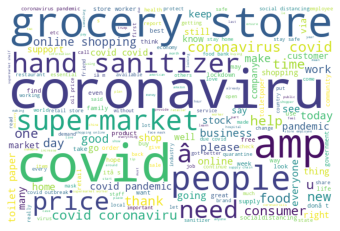

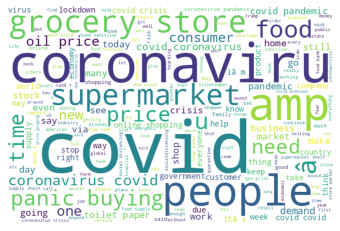

In [17]:
visualize(lemmed_pos)
visualize(lemmed_neg)

In [18]:
#now bigrams
def visualize_bi(l):
    text = ''
    for w in l:
        text += w + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white",collocation_threshold = 3).generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

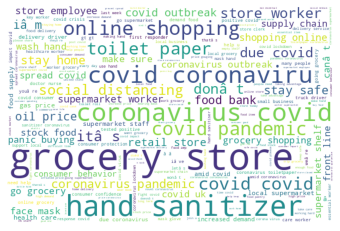

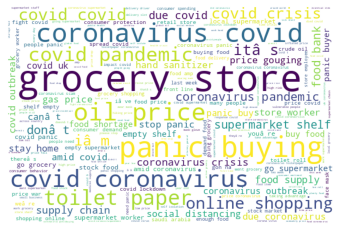

In [19]:
visualize_bi(lemmed_pos)
visualize_bi(lemmed_neg)

In [20]:
#fertig